In [22]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *



In [4]:
# Load the data
dataset = pd.read_csv("world_data.csv")

# Remove sparsely populated features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Impute all features with mean
means = dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

C:\Users\g_boilay\AppData\Local\Temp\ipykernel_24084\4184926255.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = dataset.mean().to_dict()


In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [9]:
plt.style.use('bmh')

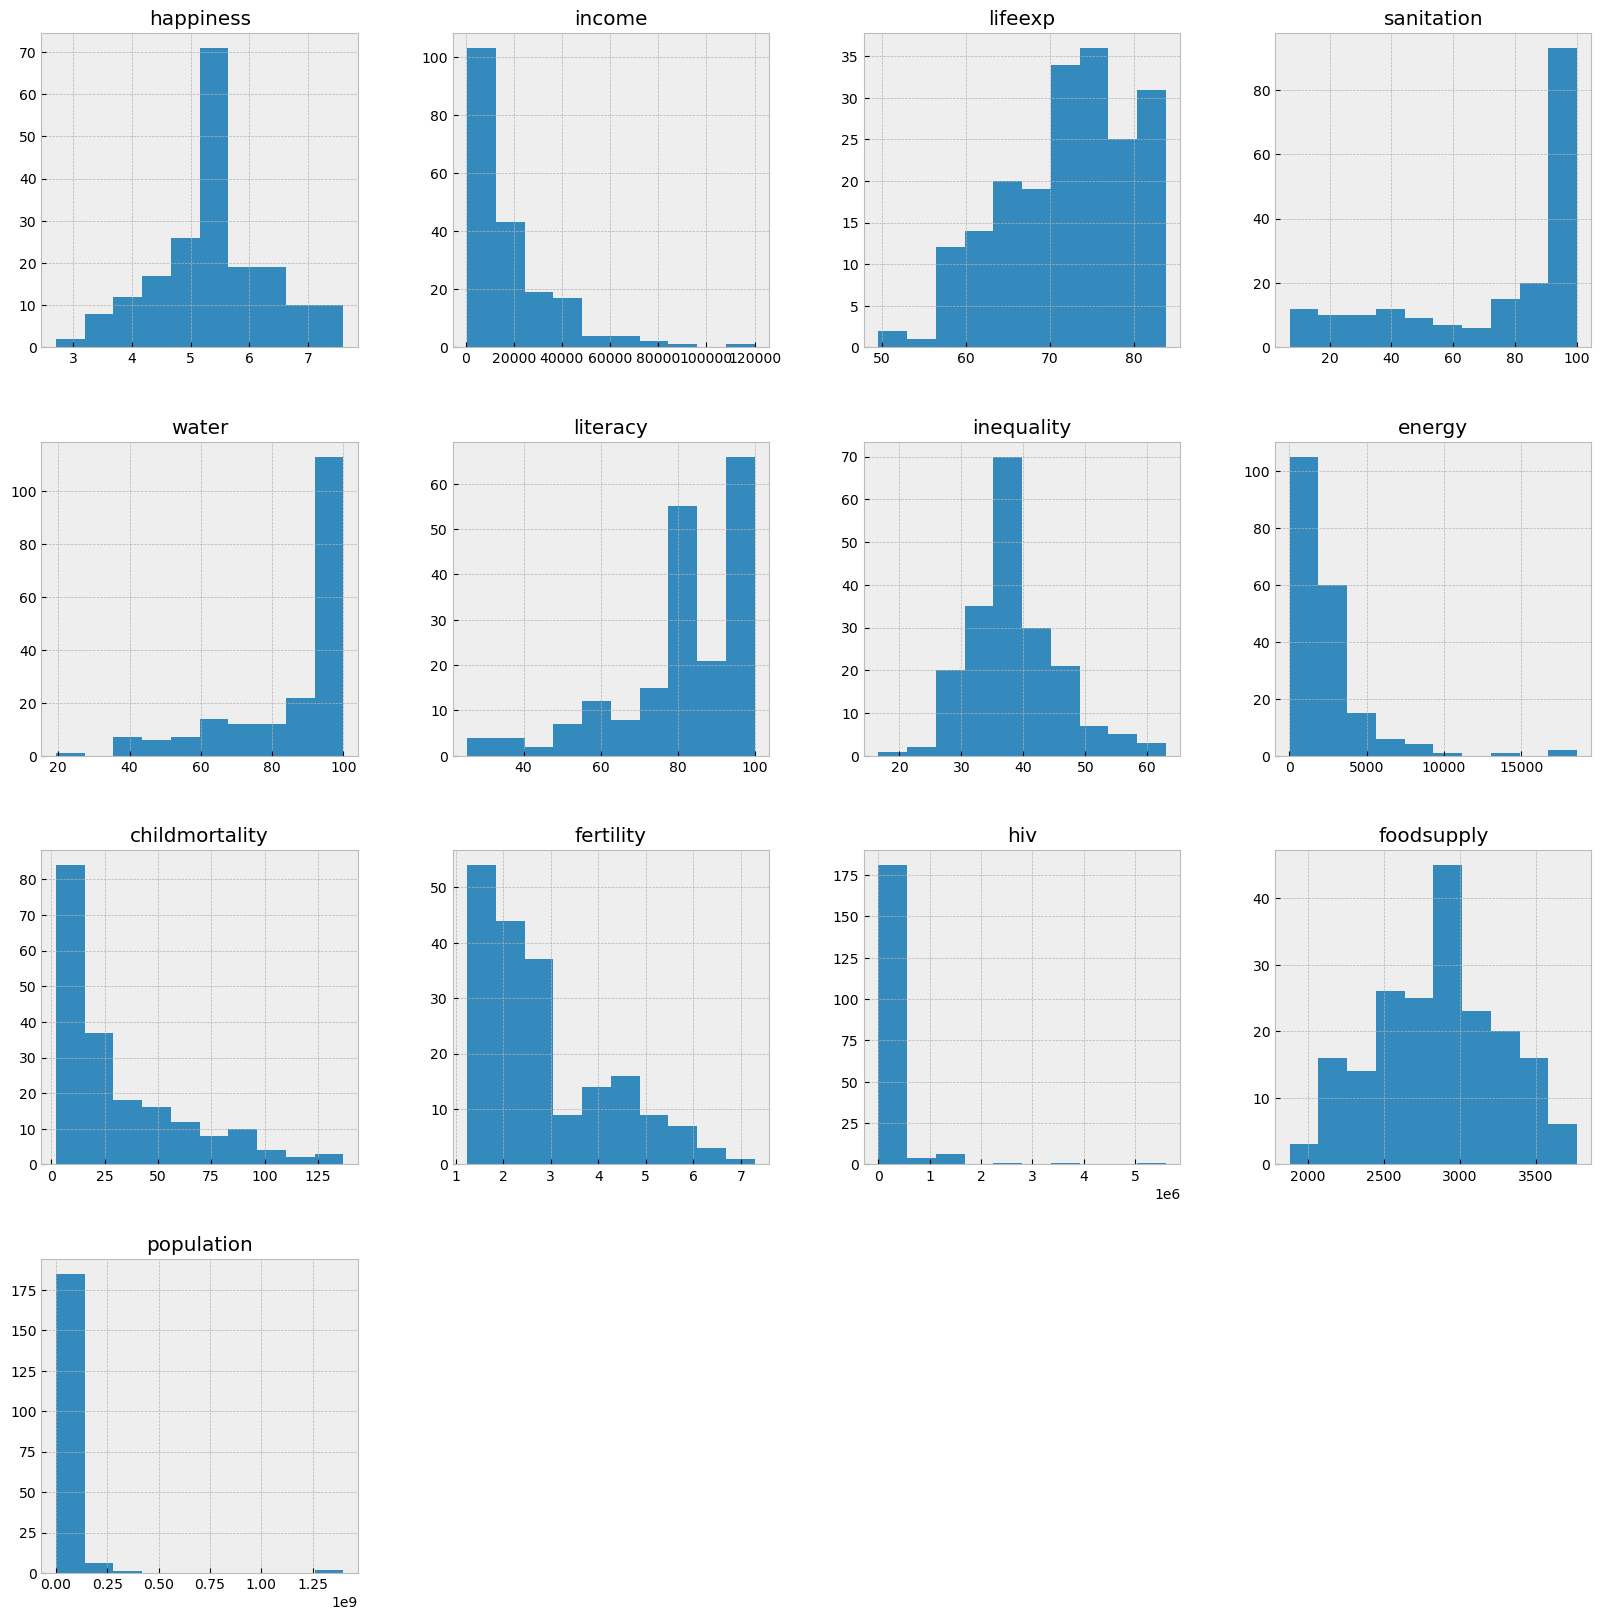

In [12]:
dataset.hist(figsize=(20,20))
plt.show()

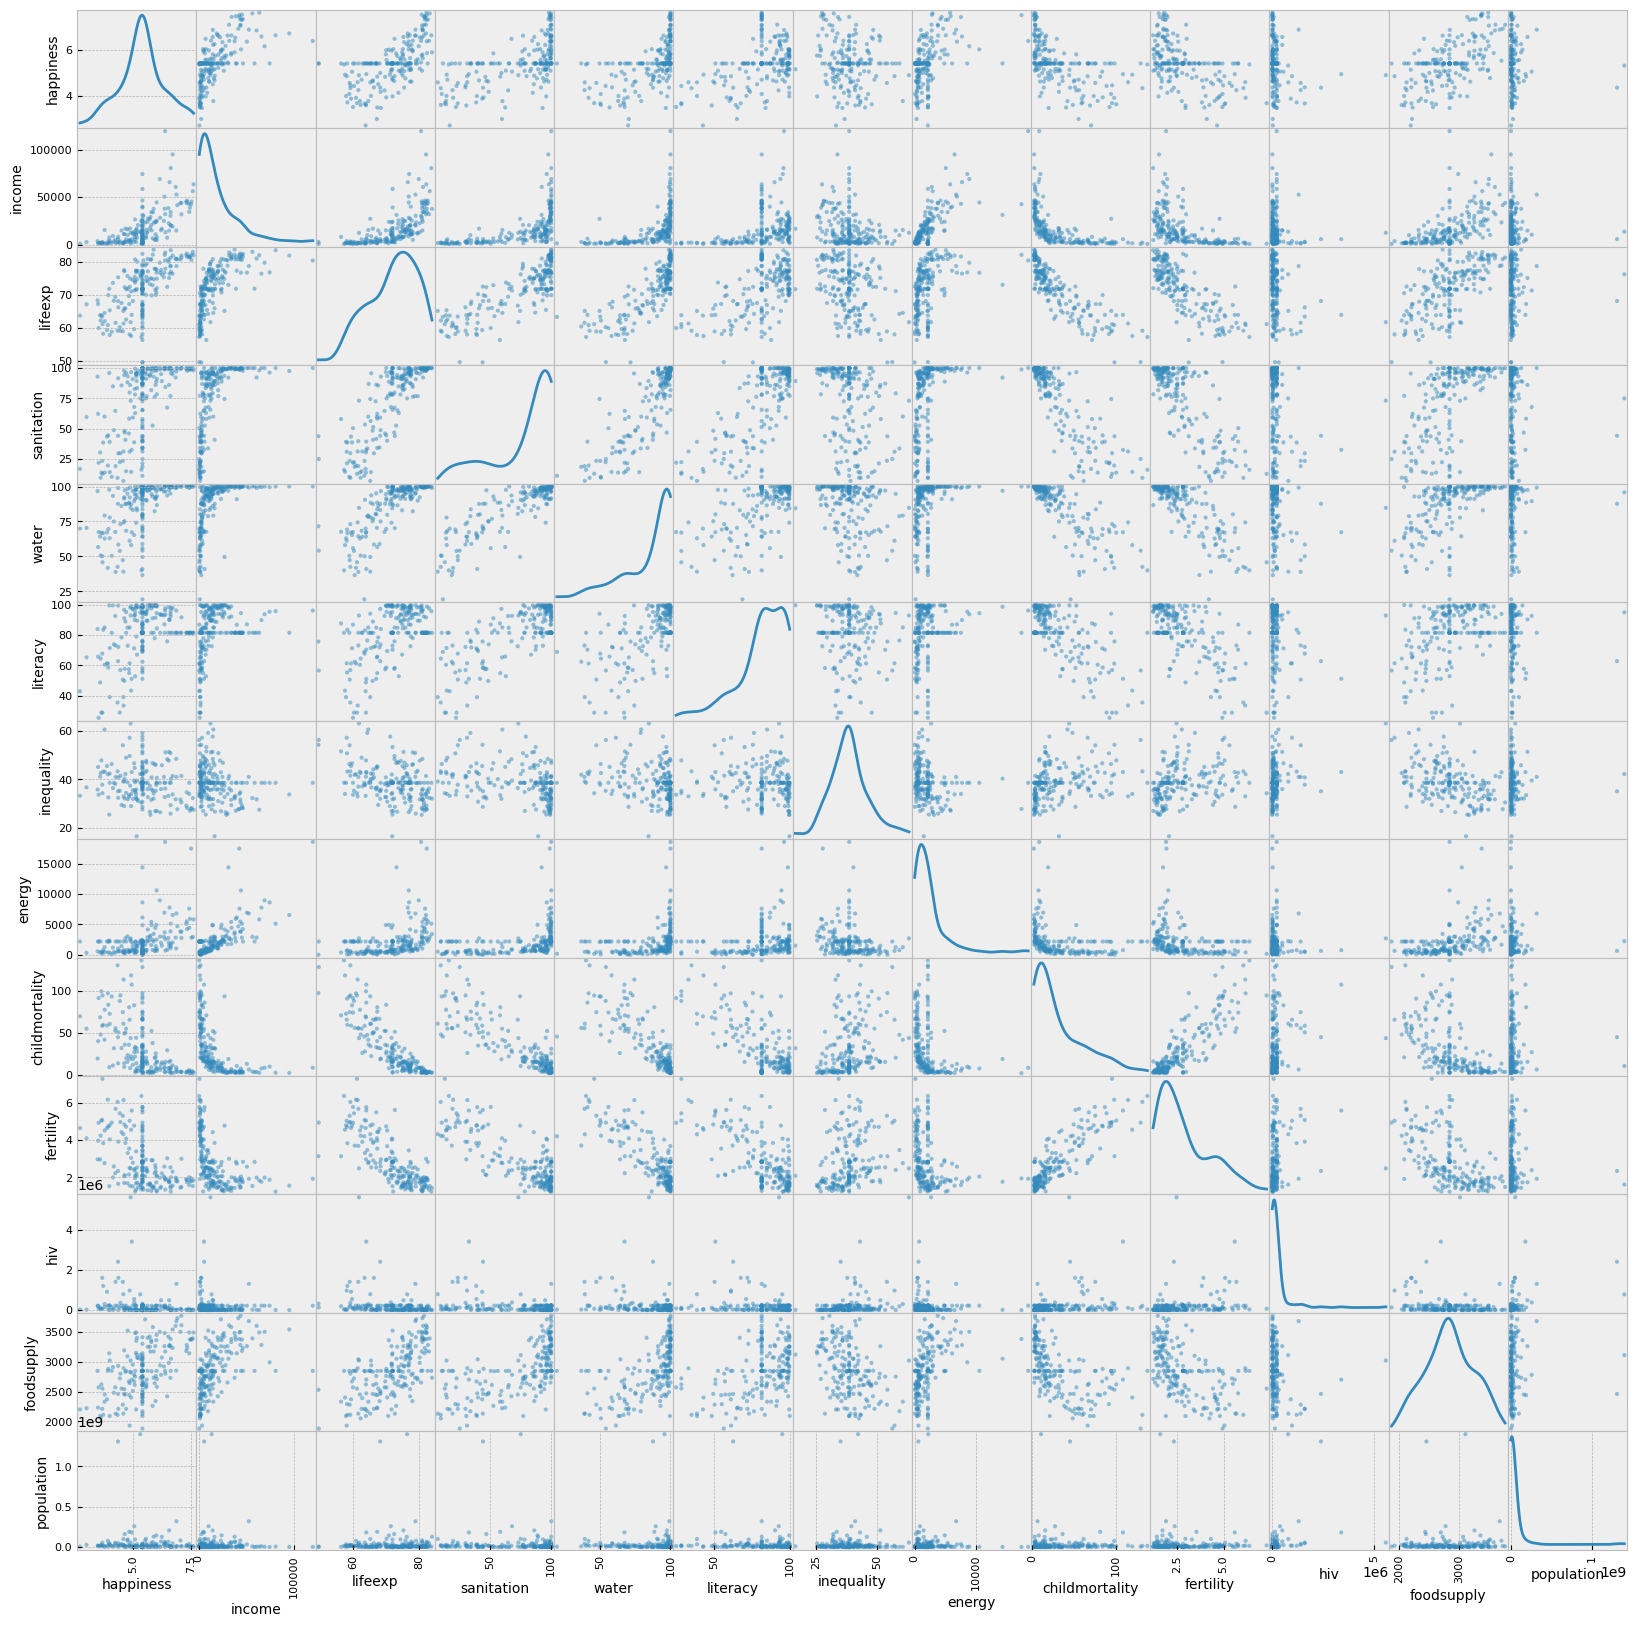

In [14]:
scatterMatrix(dataset)

In [16]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

In [18]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [20]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [24]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]

In [26]:
for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))

LinearRegression 2.2920035925091757
KNeighborsRegressor 2.1955055341375447
SVR 2.5427645613630165


In [28]:
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test, predictions))

LinearRegression 2.446395650811029
KNeighborsRegressor 2.5532340600575916
SVR 2.6412058180288183


In [30]:
model = models[0]

In [32]:
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,Prediction,Actual,Error
44,0.262009,0.027702,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02,63.053160,65.40000,2.346840
172,0.549625,0.097816,0.629789,1.000000,0.753331,0.473693,0.116950,0.247774,0.263789,0.038917,0.511086,2.142874e-07,70.676398,71.93369,1.257292
163,0.549625,0.010446,0.352131,0.558860,0.753331,0.439655,0.005617,0.398368,0.404959,0.038917,0.613757,7.214342e-05,65.940097,61.60000,-4.340097
35,0.420443,0.079387,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02,75.009327,71.90000,-3.109327
136,0.484455,0.042278,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02,72.167158,74.30000,2.132842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.549625,0.038257,0.930047,0.998761,0.986613,0.450431,0.029984,0.108309,0.403306,0.038917,0.511086,6.785768e-05,73.113437,70.30000,-2.813437
18,0.350346,0.007765,0.165949,0.428748,0.045515,0.403017,0.116950,0.640208,0.694215,0.021418,0.444444,1.292082e-02,61.812405,60.30000,-1.512405
159,0.549625,0.101167,0.766466,0.945477,0.753331,0.473693,0.041549,0.100890,0.147107,0.038917,0.301587,6.857197e-05,73.569757,71.40000,-2.169757
113,0.445901,0.098654,0.710504,0.810409,0.906292,1.000000,0.144721,0.310831,0.206612,1.000000,0.603175,3.949245e-02,65.229523,61.80000,-3.429523


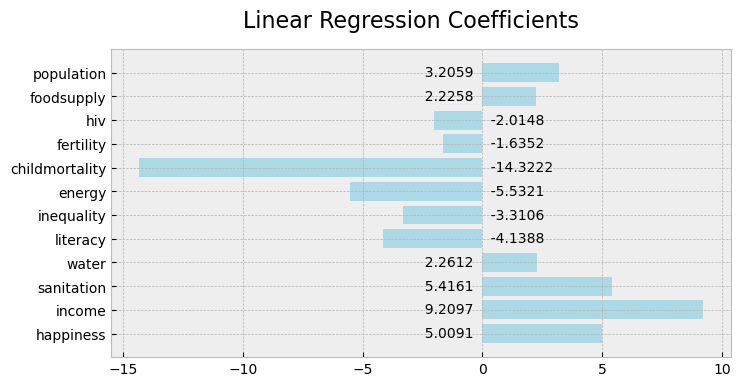

In [34]:
linearRegressionSummary(models[0],X.columns)

In [36]:
models[0].coef_


array([  5.00912637,   9.2096769 ,   5.41605897,   2.26122297,
        -4.13876626,  -3.31059309,  -5.53211396, -14.32217202,
        -1.63521978,  -2.01476135,   2.22581396,   3.20586791])

In [38]:
models[0].intercept_

69.60409836404614

In [40]:
models[1].kneighbors(X)

(array([[0.        , 0.38911668, 0.3929857 , 0.4201251 , 0.51618381],
        [0.        , 0.20505552, 0.20891422, 0.23226123, 0.26827204],
        [0.        , 0.12274953, 0.1953064 , 0.22064946, 0.22207317],
        [0.        , 0.16349608, 0.20891422, 0.22826679, 0.28847733],
        [0.13327753, 0.15176936, 0.16216559, 0.16956607, 0.18772587],
        [0.10256832, 0.15520456, 0.24629633, 0.24943538, 0.25508778],
        [0.        , 0.3593436 , 0.38793799, 0.38953126, 0.39317685],
        [0.        , 0.31469369, 0.32420127, 0.35698837, 0.41441586],
        [0.        , 0.1962574 , 0.34952635, 0.44393928, 0.51551159],
        [0.        , 0.12677335, 0.18037416, 0.18620954, 0.22384403],
        [0.        , 0.1768139 , 0.24628597, 0.25110484, 0.26795007],
        [0.50647823, 0.51036495, 0.51934624, 0.53394104, 0.5422487 ],
        [0.        , 0.28806232, 0.34952635, 0.46122169, 0.46576997],
        [0.        , 0.31134313, 0.31241819, 0.3828958 , 0.39244964],
        [0.15281102,

In [42]:
g = models[1].kneighbors_graph(X).toarray()

NameError: name 'KNeighborsRegressor' is not defined